In [77]:
import numpy as np
from numpy import random
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import statsmodels.formula.api as smf
import urllib2
plt.style.use('ggplot')


In [4]:
data = pd.read_csv('Election2016/Election2016/countytable.csv', index_col=0 )

In [5]:
data.head()

,trump,clinton,processed,area_name,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,...,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210,trumpp
fips,,,,,,,,,,,,,,,,,,,,,
1001,18110,5908,100,Autauga County,AL,55395,54571,1.5,54571,6.0,...,31.7,0,0,598175,12003,88157,131,594.44,91.8,0.754018
1003,72780,18409,100,Baldwin County,AL,200111,182265,9.8,182265,5.6,...,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6,0.798123
1005,5431,4848,100,Barbour County,AL,26887,27457,-2.1,27457,5.7,...,27.0,0,0,188337,6334,0,8,884.88,31.0,0.528359
1007,6733,1874,100,Bibb County,AL,22506,22919,-1.8,22915,5.3,...,0.0,0,0,124707,5804,10757,19,622.58,36.8,0.782270
1009,22808,2150,100,Blount County,AL,57719,57322,0.7,57322,6.1,...,23.2,341544,0,319700,5622,20941,3,644.78,88.9,0.913855


In [6]:
data.rename(columns={'PST045214': 'Population'}, inplace=True)

In [7]:
data.rename(columns={'AGE295214': 'Population18'}, inplace=True)

In [8]:
data.rename(columns={'AGE775214': 'Population65'}, inplace=True)

In [ ]:
data.rename(columns={'Population65': 'Senior'}, inplace=True)

In [9]:
data.rename(columns={'SEX255214': 'Female'}, inplace=True)

In [10]:
data.rename(columns={'RHI125214': 'White'}, inplace=True)

In [11]:
data.rename(columns={'RHI225214': 'Black'}, inplace=True)

In [12]:
data.rename(columns={'RHI425214': 'Asian'}, inplace=True)

In [13]:
data.rename(columns={'POP645213': 'Foreign'}, inplace=True)

In [14]:
data.rename(columns={'EDU685213': 'Bachelor'}, inplace=True)

In [15]:
data.rename(columns={'RHI725214': 'Latino'}, inplace=True)

In [16]:
data.rename(columns={'RHI625214': 'Mixed'}, inplace=True)

In [17]:
data.rename(columns={'RHI825214': 'WhiteNH'}, inplace=True)

In [18]:
data.rename(columns={'POP060210': 'Density'}, inplace=True)

In [19]:
data.rename(columns={'HSG445213': 'HomeOwners'}, inplace=True)

In [20]:
data.rename(columns={'INC910213': 'Income'}, inplace=True)

In [21]:
data.columns

Index([u'trump', u'clinton', u'processed', u'area_name', u'state_abbreviation',
       u'Population', u'PST040210', u'PST120214', u'POP010210', u'AGE135214',
       u'Population18', u'Population65', u'Female', u'White', u'Black',
       u'RHI325214', u'Asian', u'RHI525214', u'Mixed', u'Latino', u'WhiteNH',
       u'POP715213', u'Foreign', u'POP815213', u'EDU635213', u'Bachelor',
       u'VET605213', u'LFE305213', u'HSG010214', u'HomeOwners', u'HSG096213',
       u'HSG495213', u'HSD410213', u'HSD310213', u'Income', u'INC110213',
       u'PVY020213', u'BZA010213', u'BZA110213', u'BZA115213', u'NES010213',
       u'SBO001207', u'SBO315207', u'SBO115207', u'SBO215207', u'SBO515207',
       u'SBO415207', u'SBO015207', u'MAN450207', u'WTN220207', u'RTN130207',
       u'RTN131207', u'AFN120207', u'BPS030214', u'LND110210', u'Density',
       u'trumpp'],
      dtype='object')

In [21]:
# data['Bachelor']

In [22]:
data.state_abbreviation.unique()

array(['AL', 'AZ', 'AR', 'CA', 'CO', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN',
       'KS', 'KY', 'LA', 'ME', 'MD', 'MI', 'MN', 'MO', 'MT', 'NE', 'NJ',
       'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VA', 'WA', 'WV'], dtype=object)

In [23]:
#  NH CT RI MA VT C

In [ ]:
'TFemale', 'TSeniors', 'TBlack', 'TLatino', 'TAsian', 'TIncome', 'TBachelor', 'TArea', 'TRacialDiversity', 'TForeign'

In [22]:
data['TElectorate']=data.Population*(1-data.Population18/100)
data['TFemale']=data.TElectorate*data.Female/100
data['TSeniors']=data.TElectorate*data.Population65/100
data['TWhite']=data.TElectorate*data.WhiteNH/100
data['TBlack']=data.TElectorate*data.Black/100
data['TLatino']=data.TElectorate*data.Latino/100
data['TAsian']=data.TElectorate*data.Asian/100
data['TIncome']=data.Population*data.Income/100
data['TBachelor']=data.Population*data.Bachelor/100
data['TArea']=data.LND110210
data['TRacialDiversity'] = data.TElectorate*(1-data.WhiteNH/100)
#Racial Diversity is defined as the percentage of nonwhite voters
data['TForeign'] = data.TElectorate*data.Foreign/100

In [23]:
data['SElectorate']=data['TElectorate']**0.5
data['SFemale']=data.SElectorate*data.Female/100
data['SSeniors']=data.SElectorate*data.Population65/100
data['SWhite']=data.SElectorate*data.WhiteNH/100
data['SBlack']=data.SElectorate*data.Black/100
data['SLatino']=data.SElectorate*data.Latino/100
data['SAsian']=data.SElectorate*data.Asian/100
data['SIncome']=data['TIncome']/data.SElectorate
data['SBachelor']=data['TBachelor']/data.SElectorate
data['SRacialDiversity'] = data.SElectorate*(1-data.WhiteNH/100)
#Squaring Racial Diversity Varaible 
data['SForeign'] = data.SElectorate*data.Foreign/100

In [26]:
data['TDensity']=np.log(data.Density)*data.TElectorate
data['TSize']=np.log(data.Population)*data.TElectorate

In [27]:
data['SDensity']=np.log(data.Density)*data.SElectorate
data['SSize']=np.log(data.Population)*data.SElectorate

In [28]:
data['Strump']=data.trump/data.SElectorate
data['Sclinton']=data.clinton/data.SElectorate

In [29]:
data.head()

,trump,clinton,processed,area_name,state_abbreviation,Population,PST040210,PST120214,POP010210,AGE135214,...,SIncome,SBachelor,SRacialDiversity,SForeign,TDensity,TSize,SDensity,SSize,Strump,Sclinton
fips,,,,,,,,,,,,,,,,,,,,,
1001,18110,5908,100,Autauga County,AL,55395,54571,1.5,54571,6.0,...,66866.303674,56.876226,49.667913,3.256912,187272.214574,4.525682e+05,919.998807,2223.299555,88.967701,29.023809
1003,72780,18409,100,Baldwin County,AL,200111,182265,9.8,182265,5.6,...,135746.661102,140.483543,67.077088,14.204560,738178.740296,1.900405e+06,1870.838306,4816.382515,184.453445,46.655722
1005,5431,4848,100,Barbour County,AL,26887,27457,-2.1,27457,5.7,...,31086.109701,24.752146,77.727650,4.221165,72755.735806,2.160942e+05,499.842241,1484.597856,37.311742,33.306449
1007,6733,1874,100,Bibb County,AL,22506,22919,-1.8,22915,5.3,...,29414.281394,20.423068,34.001876,1.600088,64104.814258,1.781803e+05,480.759576,1336.278702,50.494713,14.054224
1009,22808,2150,100,Blount County,AL,57719,57322,0.7,57322,6.1,...,56978.632505,33.258150,25.619220,9.029725,197887.241003,4.834539e+05,942.348872,2302.231692,108.612829,10.238407


In [30]:
data.columns

Index([u'trump', u'clinton', u'processed', u'area_name', u'state_abbreviation',
       u'Population', u'PST040210', u'PST120214', u'POP010210', u'AGE135214',
       u'Population18', u'Population65', u'Female', u'White', u'Black',
       u'RHI325214', u'Asian', u'RHI525214', u'Mixed', u'Latino', u'WhiteNH',
       u'POP715213', u'Foreign', u'POP815213', u'EDU635213', u'Bachelor',
       u'VET605213', u'LFE305213', u'HSG010214', u'HomeOwners', u'HSG096213',
       u'HSG495213', u'HSD410213', u'HSD310213', u'Income', u'INC110213',
       u'PVY020213', u'BZA010213', u'BZA110213', u'BZA115213', u'NES010213',
       u'SBO001207', u'SBO315207', u'SBO115207', u'SBO215207', u'SBO515207',
       u'SBO415207', u'SBO015207', u'MAN450207', u'WTN220207', u'RTN130207',
       u'RTN131207', u'AFN120207', u'BPS030214', u'LND110210', u'Density',
       u'trumpp', u'TElectorate', u'TFemale', u'TSeniors', u'TWhite',
       u'TBlack', u'TLatino', u'TAsian', u'TIncome', u'TBachelor', u'TArea',
       u'TRac

In [31]:
lm0 = smf.ols(formula='Strump ~ SElectorate -1', data = data).fit()

In [32]:
lm0.rsquared

0.8902122532409068

In [33]:
def singleFactorAnalysis(factor):
    lmT0 = smf.ols(formula='Strump ~ SElectorate -1', data = data).fit()
    lmC0 = smf.ols(formula='Sclinton ~ SElectorate -1', data = data).fit()
    lmT = smf.ols(formula='Strump ~ SElectorate + ' + factor +' -1', data = data).fit()
    lmC = smf.ols(formula='Sclinton ~ SElectorate + ' + factor +' -1', data = data).fit()
    R2T=1-(1-lmT.rsquared)/(1-lmT0.rsquared)
    R2C=1-(1-lmC.rsquared)/(1-lmC0.rsquared)
    return [R2T, R2C]

In [34]:
singleFactorAnalysis('SWhite')

[0.22931754177733599, 0.034002251671160888]

In [35]:
singleFactorAnalysis('SBlack')

[0.011336077696619817, 0.078504171653229871]

In [36]:
singleFactorAnalysis('SLatino')

[0.21472458532444216, 0.081301351016036305]

In [37]:
singleFactorAnalysis('SSize')

[0.13552314515697672, 0.0076372366252546176]

In [38]:
singleFactorAnalysis('SFemale')

[0.0014275605127226365, 0.052320513253841905]

In [39]:
singleFactorAnalysis('SSeniors')

[0.091021663849851331, 0.0072777884350281319]

In [40]:
singleFactorAnalysis('SIncome')

[0.011019157485152253, 0.0033128042567523996]

In [41]:
singleFactorAnalysis('SBachelor')

[0.00044924324338657673, 0.016497196366543787]

In [42]:
singleFactorAnalysis('SDensity')

[0.023504482051504572, 0.00014452966271072398]

In [43]:
singleFactorAnalysis('SRacialDiversity')

[0.22931754177733599, 0.034002251671160888]

In [44]:
singleFactorAnalysis('SForeign')

[0.11202994363499064, 0.089443540280229494]

In [45]:
# lmT0 = smf.ols(formula='Strump ~ SElectorate -1', data = data).fit()
# lmT = smf.ols(formula='Strump ~ SElectorate + SFemale + SWhite + SBlack + SLatino + SIncome + data.SBachelor + data.SSeniors + data.SDensity + data.SSize-1', data = data).fit()
# R2T=1-(1-lmT.rsquared)/(1-lm0.rsquared)
# lmC0 = smf.ols(formula='Sclinton ~ SElectorate -1', data = data).fit()
# lmC = smf.ols(formula='Sclinton ~ SElectorate + SFemale + SWhite + SBlack + SLatino + SIncome + data.SBachelor + data.SSeniors + data.SDensity + data.SSize-1', data = data).fit()
# R2C=1-(1-lmC.rsquared)/(1-lmC0.rsquared)
# print [R2T, R2C]

In [46]:
lmT0 = smf.ols(formula='Strump ~ SElectorate -1', data = data).fit()
lmT1 = smf.ols(formula='Strump ~ SElectorate + SIncome + SBachelor + SDensity + SRacialDiversity + SForeign', data=data).fit()
R2T=1-(1-lmT1.rsquared)/(1-lm0.rsquared)
lmC0 = smf.ols(formula='Sclinton ~ SElectorate -1', data = data).fit()
lmC = smf.ols(formula='Sclinton ~ SElectorate + SIncome + SBachelor + SDensity + SRacialDiversity + SForeign', data = data).fit()
R2C=1-(1-lmC.rsquared)/(1-lmC0.rsquared)
print [R2T, R2C]

[-0.54621717362776279, -0.35751901837303546]


In [47]:
lmT0 = smf.ols(formula='Strump ~ SElectorate -1', data = data).fit()
lmT1 = smf.ols(formula='Strump ~ SElectorate + SIncome + SBachelor + SDensity + SRacialDiversity + SForeign', data=data).fit()
R2T=1-(1-lmT1.rsquared)/(1-lmT0.rsquared)
lmC0 = smf.ols(formula='Sclinton ~ SElectorate -1', data = data).fit()
lmC = smf.ols(formula='Sclinton ~ SElectorate + SIncome + SBachelor + SDensity + SRacialDiversity + SForeign', data = data).fit()
R2C=1-(1-lmC.rsquared)/(1-lmC0.rsquared)
print [R2T, R2C]

[-0.54621717362776279, -0.35751901837303546]


In [48]:
def addFactorAnalysis(previos,factor):
    lmP = smf.ols(formula='Strump ~ ' + previos +' -1', data = data).fit()
    lmX = smf.ols(formula=factor+' ~ ' + previos +' -1', data = data).fit()
    XP = lmX.predict()
    dataX=data
    dataX['X']=data[factor]-XP
    lm = smf.ols(formula='Strump ~ ' + previos +' + X -1', data = dataX).fit()
    pvalue=lm.pvalues[-1]
    est=[lm.conf_int()[0].X, lm.conf_int()[1].X]
    XR2=1-(1-lm.rsquared)/(1-lmP.rsquared)
    print 'R2 = %.4f, p-value=%e, estimate=[%e %e]'%(XR2,pvalue,est[0],est[1])
    return [est,pvalue,XR2]

In [49]:
addFactorAnalysis('SElectorate','SIncome');

R2 = 0.0110, p-value=6.446414e-08, estimate=[7.730090e-05 1.649018e-04]


In [50]:
addFactorAnalysis('SElectorate + SIncome','SBachelor');

R2 = 0.0498, p-value=3.634641e-31, estimate=[-3.793786e-01 -2.709585e-01]


In [51]:
addFactorAnalysis('SElectorate + SIncome + SBachelor + SDensity', 'SRacialDiversity')

R2 = 0.1974, p-value=5.096338e-128, estimate=[-2.419319e-01 -2.073295e-01]


[[-0.24193188253489895, -0.20732947029457238],
 5.0963375218419439e-128,
 0.19741897292237676]

In [52]:
addFactorAnalysis('SElectorate + SIncome + SBachelor ', 'SRacialDiversity')

R2 = 0.2175, p-value=1.385165e-142, estimate=[-2.200074e-01 -1.902844e-01]


[[-0.22000740636492522, -0.190284416700429],
 1.3851653657709554e-142,
 0.21749040664879737]

In [53]:
addFactorAnalysis('SElectorate + SIncome + SBachelor + SRacialDiversity ','SForeign')

R2 = 0.0000, p-value=9.796680e-01, estimate=[-5.105907e-02 4.974876e-02]


[[-0.051059070071195721, 0.049748756648825838],
 0.97966798680187284,
 2.4653375996219751e-07]

In [54]:
lm_ = smf.ols(formula='SElectorate ~ SIncome + SBachelor + SRacialDiversity + SForeign + SDensity', data = data).fit()
print lm_.summary()

                            OLS Regression Results                            
Dep. Variable:            SElectorate   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                 1.871e+04
Date:                Mon, 12 Dec 2016   Prob (F-statistic):               0.00
Time:                        22:38:31   Log-Likelihood:                -12862.
No. Observations:                2640   AIC:                         2.574e+04
Df Residuals:                    2634   BIC:                         2.577e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept           50.5030      1.002  

In [55]:
for s in [u'SIncome',
       u'SBachelor', u'SRacialDiversity', u'SForeign', u'SDensity']:
    data[s + '_norm'] = data[s] / data[s].mean()

In [56]:
data.head()

,trump,clinton,processed,area_name,state_abbreviation,Population,PST040210,PST120214,POP010210,AGE135214,...,SDensity,SSize,Strump,Sclinton,X,SIncome_norm,SBachelor_norm,SRacialDiversity_norm,SForeign_norm,SDensity_norm
fips,,,,,,,,,,,,,,,,,,,,,
1001,18110,5908,100,Autauga County,AL,55395,54571,1.5,54571,6.0,...,919.998807,2223.299555,88.967701,29.023809,-10.064153,1.042057,0.949301,0.882566,0.220220,0.948865
1003,72780,18409,100,Baldwin County,AL,200111,182265,9.8,182265,5.6,...,1870.838306,4816.382515,184.453445,46.655722,-2.238515,2.115500,2.344761,1.191916,0.960459,1.929538
1005,5431,4848,100,Barbour County,AL,26887,27457,-2.1,27457,5.7,...,499.842241,1484.597856,37.311742,33.306449,-15.586054,0.484452,0.413129,1.381169,0.285419,0.515525
1007,6733,1874,100,Bibb County,AL,22506,22919,-1.8,22915,5.3,...,480.759576,1336.278702,50.494713,14.054224,-2.440897,0.458397,0.340874,0.604191,0.108192,0.495844
1009,22808,2150,100,Blount County,AL,57719,57322,0.7,57322,6.1,...,942.348872,2302.231692,108.612829,10.238407,9.521413,0.887965,0.555100,0.455237,0.610556,0.971916


In [57]:
lm_ = smf.ols(formula='trumpp ~ SBachelor_norm + SIncome_norm + SRacialDiversity_norm ' +
              '+ SForeign_norm + SDensity_norm', data = data).fit()
print lm_.summary()

                            OLS Regression Results                            
Dep. Variable:                 trumpp   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     42.58
Date:                Mon, 12 Dec 2016   Prob (F-statistic):           2.62e-42
Time:                        22:40:24   Log-Likelihood:                 710.20
No. Observations:                2640   AIC:                            -1408.
Df Residuals:                    2634   BIC:                            -1373.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
Intercept                 0.68

*** step 3

In [58]:
addFactorAnalysis('SElectorate + SWhite + SLatino','SIncome'); #!!!!

R2 = 0.0201, p-value=2.632620e-13, estimate=[1.053654e-04 1.820423e-04]


In [59]:
addFactorAnalysis('SElectorate + SWhite + SLatino','SBachelor');

R2 = 0.0016, p-value=3.729325e-02, estimate=[1.581952e-03 5.213206e-02]


In [60]:
addFactorAnalysis('SElectorate + SWhite + SLatino','SBlack');

R2 = 0.0003, p-value=4.024792e-01, estimate=[-6.174282e-02 2.479084e-02]


In [61]:
addFactorAnalysis('SElectorate + SWhite + SLatino','SFemale');

R2 = 0.0049, p-value=3.261596e-04, estimate=[2.237080e-01 7.594876e-01]


In [62]:
addFactorAnalysis('SElectorate + SWhite + SLatino','SDensity');

R2 = 0.0070, p-value=1.781980e-05, estimate=[2.843296e-03 7.613341e-03]


In [63]:
addFactorAnalysis('SElectorate + SWhite + SLatino','SSize');

R2 = 0.0063, p-value=4.646210e-05, estimate=[-7.845629e-03 -2.751867e-03]


***step 4 *****

In [64]:
addFactorAnalysis('SElectorate + SWhite + SLatino + SIncome','SBachelor'); #!!!!

R2 = 0.0266, p-value=3.385761e-17, estimate=[-2.603984e-01 -1.626870e-01]


In [65]:
addFactorAnalysis('SElectorate + SWhite + SLatino + SIncome ', 'SSize');

R2 = 0.0282, p-value=3.817421e-18, estimate=[-1.546747e-02 -9.802783e-03]


In [66]:
addFactorAnalysis('SElectorate + SWhite + SLatino + SIncome + SSize', 'SBachelor');

R2 = 0.0148, p-value=3.695754e-10, estimate=[-2.129300e-01 -1.117267e-01]


In [67]:
addFactorAnalysis('SElectorate + SWhite + SLatino + SIncome + SSize', 'SSeniors');

R2 = 0.0203, p-value=1.916950e-13, estimate=[2.498316e-01 4.301947e-01]


In [68]:
addFactorAnalysis('SElectorate + SWhite + SLatino + SIncome + SSize', 'SFemale');

R2 = 0.0114, p-value=4.017374e-08, estimate=[4.884500e-01 1.028733e+00]


In [69]:
addFactorAnalysis('SElectorate + SWhite + SLatino + SIncome + SFemale + SBachelor + SSeniors', 'SSize');

R2 = 0.0216, p-value=3.523742e-14, estimate=[-1.462950e-02 -8.641034e-03]


In [70]:
def addFactorAnalysisC(previos,factor):
    lmP = smf.ols(formula='Sclinton ~ ' + previos +' -1', data = data).fit()
    lmX = smf.ols(formula=factor+' ~ ' + previos +' -1', data = data).fit()
    XP = lmX.predict()
    dataX=data
    dataX['X']=data[factor]-XP
    lm = smf.ols(formula='Sclinton ~ ' + previos +' + X -1', data = dataX).fit()
    pvalue=lm.pvalues[-1]
    est=[lm.conf_int()[0].X, lm.conf_int()[1].X]
    XR2=1-(1-lm.rsquared)/(1-lmP.rsquared)
    print 'R2 = %.4f, p-value=%e, estimate=[%e %e]'%(XR2,pvalue,est[0],est[1])
    return [est,pvalue,XR2]

In [71]:
addFactorAnalysisC('SElectorate ', 'SSize');

R2 = 0.0076, p-value=6.900844e-06, estimate=[-7.662697e-03 -3.015620e-03]


In [72]:
addFactorAnalysisC('SElectorate + SWhite + SLatino + SIncome + SFemale + SBachelor + SSeniors', 'SSize');

R2 = 0.0029, p-value=5.803521e-03, estimate=[-8.290389e-03 -1.404742e-03]


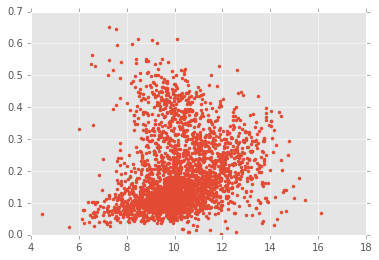

In [78]:
plt.plot(data.SSize/data.SElectorate,data.Sclinton/data.SElectorate,'.')

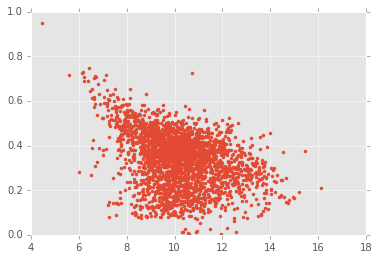

In [79]:
plt.plot(data.SSize/data.SElectorate,data.Strump/data.SElectorate,'.')

In [80]:
lmTrump = smf.ols(formula='Strump ~ SElectorate + SWhite + SLatino + SIncome + SFemale + SBachelor + SSeniors', data = data).fit()
resTrump = data.Strump - lmTrump.predict()

In [81]:
lmClinton = smf.ols(formula='Sclinton ~ SElectorate + SWhite + SLatino + SIncome + SFemale + SBachelor + SSeniors', data = data).fit()
resClinton = data.Sclinton - lmClinton.predict()

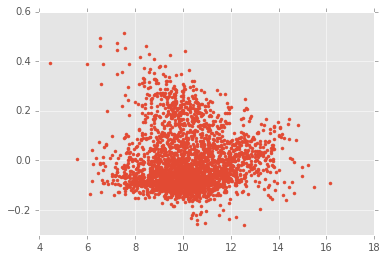

In [83]:
plt.plot(data.SSize/data.SElectorate,resClinton/data.SElectorate,'.')

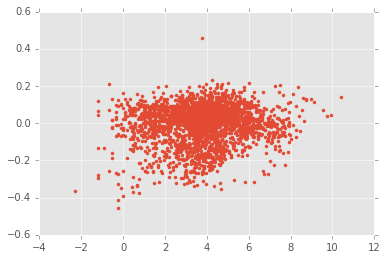

In [84]:
plt.plot(data.SDensity/data.SElectorate,resTrump/data.SElectorate,'.')

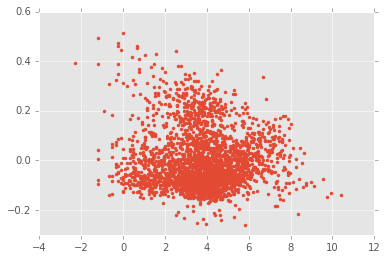

In [85]:
plt.plot(data.SDensity/data.SElectorate,resClinton/data.SElectorate,'.')

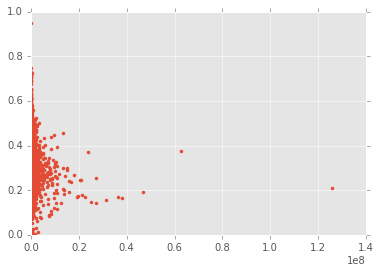

In [86]:
plt.plot(data.TSize,data.trump/data.TElectorate,'.')

In [87]:
ind=(data.Population<1e4)&(data.Population>1e3)
1.0*sum(data.trump[ind])/(sum(data.trump[ind])+sum(data.clinton[ind]))

0.6807789237537512

In [88]:
ind=(data.Population<1e3)&(data.Population>1e1)
1.0*sum(data.trump[ind])/(sum(data.trump[ind])+sum(data.clinton[ind]))

0.7988649066987703

In [89]:
ind=(data.Population<1e5)&(data.Population>1e4)
1.0*sum(data.trump[ind])/(sum(data.trump[ind])+sum(data.clinton[ind]))

0.6234965717197312

In [90]:
ind=(data.Population<1e7)&(data.Population>1e5)
1.0*sum(data.trump[ind])/(sum(data.trump[ind])+sum(data.clinton[ind]))

0.5492493444489315

In [91]:
ind=(data.Density<1e2)&(data.Population>1e1)
1.0*sum(data.trump[ind])/(sum(data.trump[ind])+sum(data.clinton[ind]))

0.6141529737655815

In [92]:
ind=(data.Density<1e3)&(data.Population>1e2)
1.0*sum(data.trump[ind])/(sum(data.trump[ind])+sum(data.clinton[ind]))

0.5833182847324875

In [93]:
ind=(data.Density<1e4)&(data.Density>1e3)
1.0*sum(data.trump[ind])/(sum(data.trump[ind])+sum(data.clinton[ind]))

0.5391731233985939

In [94]:
ind=(data.Density<1e2)&(data.Density>1e1)
1.0*(0*sum(data.trump[ind])+1*sum(data.clinton[ind]))/sum(data.TElectorate[ind])

0.19143366636014095

In [95]:
ind=(data.Density<1e3)&(data.Density>1e2)
1.0*(0*sum(data.trump[ind])+1*sum(data.clinton[ind]))/sum(data.TElectorate[ind])

0.21322817740492547

In [96]:
ind=(data.Density<1e4)&(data.Density>1e3)
1.0*(0*sum(data.trump[ind])+1*sum(data.clinton[ind]))/sum(data.TElectorate[ind])

0.21518141193793403

In [97]:
ind=(data.Density<1e3)&(data.Density>1e2)
1.0*(sum(data.TLatino[ind]))/sum(data.TElectorate[ind])

0.16025357987793523

In [98]:
ind=(data.Density<1e2)&(data.Density>1e1)
1.0*sum(data.TLatino[ind])/sum(data.TElectorate[ind])

0.11485779576686408

In [99]:
ind=(data.Density<1e4)&(data.Population>1e3)
1.0*sum(data.TLatino[ind])/sum(data.TElectorate[ind])

0.17836676856992692

In [100]:
addFactorAnalysis('TElectorate','TDensity');

R2 = 0.1351, p-value=3.097192e-85, estimate=[-8.793852e-05 -7.244508e-05]


In [101]:
ind=(data.Density<1e2)&(data.Population>1e1)
1.0*sum(data.TDensity[ind])/sum(data.TElectorate[ind])

3.6732543252525525

In [102]:
singleFactorAnalysis('TDensity')

[0.069083116054926896, 0.059871395032437102]

In [104]:
lm_ = smf.ols(formula='trumpp ~ SDensity', data = data).fit()
print lm_.summary()

                            OLS Regression Results                            
Dep. Variable:                 trumpp   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     114.5
Date:                Mon, 12 Dec 2016   Prob (F-statistic):           3.47e-26
Time:                        22:44:34   Log-Likelihood:                 663.69
No. Observations:                2640   AIC:                            -1323.
Df Residuals:                    2638   BIC:                            -1312.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept           0.7262      0.009     

In [105]:
lm_ = smf.ols(formula='trump ~ TDensity', data = data).fit()
print lm_.summary()

                            OLS Regression Results                            
Dep. Variable:                  trump   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                 2.692e+04
Date:                Mon, 12 Dec 2016   Prob (F-statistic):               0.00
Time:                        22:44:51   Log-Likelihood:                -29685.
No. Observations:                2640   AIC:                         5.937e+04
Df Residuals:                    2638   BIC:                         5.939e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   6504.6446    370.460     17.558      0.0

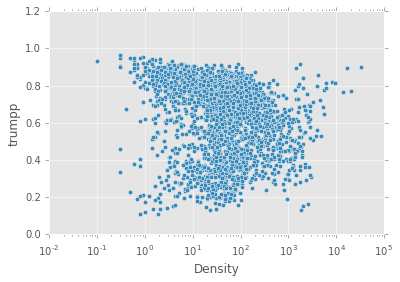

In [106]:
data.plot(x='Density', y = 'trumpp', kind='scatter', logx=True)

In [108]:
from sklearn.ensemble import RandomForestClassifier

In [109]:
data.columns

Index([                u'trump',               u'clinton',
                   u'processed',             u'area_name',
          u'state_abbreviation',            u'Population',
                   u'PST040210',             u'PST120214',
                   u'POP010210',             u'AGE135214',
                u'Population18',          u'Population65',
                      u'Female',                 u'White',
                       u'Black',             u'RHI325214',
                       u'Asian',             u'RHI525214',
                       u'Mixed',                u'Latino',
                     u'WhiteNH',             u'POP715213',
                     u'Foreign',             u'POP815213',
                   u'EDU635213',              u'Bachelor',
                   u'VET605213',             u'LFE305213',
                   u'HSG010214',            u'HomeOwners',
                   u'HSG096213',             u'HSG495213',
                   u'HSD410213',             u'HSD310213

In [117]:
data_new = data[['SIncome_norm', 'SBachelor_norm',\
                 'SRacialDiversity_norm', 'SForeign_norm', 'SDensity_norm']]

In [120]:
data_new.head()

,SIncome_norm,SBachelor_norm,SRacialDiversity_norm,SForeign_norm,SDensity_norm
fips,,,,,
1001,1.042057,0.949301,0.882566,0.220220,0.948865
1003,2.115500,2.344761,1.191916,0.960459,1.929538
1005,0.484452,0.413129,1.381169,0.285419,0.515525
1007,0.458397,0.340874,0.604191,0.108192,0.495844
1009,0.887965,0.555100,0.455237,0.610556,0.971916


In [124]:
data_new.shape

(2640, 6)

In [121]:
data_new = data_new.dropna()

In [122]:
clf = RandomForestClassifier(n_estimators=100)

In [123]:
model = clf.fit(data_new, data.trumpp)

In [124]:
model.feature_importances_

array([ 0.19854848,  0.20199685,  0.20001087,  0.19939817,  0.20004563])

In [125]:
data_new = data[['SFemale', 'SBachelor','SLatino','SBlack', 'SAsian',\
                 'SIncome', 'SForeign', 'SDensity']]

In [127]:
data_new = data_new.dropna()

In [128]:
data_new.head()

,SFemale,SBachelor,SLatino,SBlack,SAsian,SIncome,SForeign,SDensity
fips,,,,,,,,
1001,104.628308,56.876226,5.496040,38.065163,2.239127,66866.303674,3.256912,919.998807
1003,202.020406,140.483543,18.150271,37.878826,3.551140,135746.661102,14.204560,1870.838306
1005,67.829747,24.752146,6.550083,69.285321,0.727787,31086.109701,4.221165,499.842241
1007,61.203377,20.423068,2.800155,29.468293,0.266681,29414.281394,1.600088,480.759576
1009,106.046773,33.258150,18.269444,3.779885,0.629981,56978.632505,9.029725,942.348872


In [129]:
clf = RandomForestClassifier(n_estimators=100)
model = clf.fit(data_new, data.Strump)
model.feature_importances_

array([ 0.12211167,  0.12623843,  0.12707195,  0.12721106,  0.12669967,
        0.1235493 ,  0.1253015 ,  0.12181642])

In [130]:
data_new = data[['TFemale', 'TSeniors', 'TBlack', 'TLatino', 'TAsian',\
                 'TIncome', 'TBachelor', 'TArea', 'TRacialDiversity', 'TForeign']]
data_new = data_new.dropna()
clf = RandomForestClassifier(n_estimators=100)
model = clf.fit(data_new, data.trump)
model.feature_importances_

array([ 0.09488581,  0.10050186,  0.10301549,  0.10083636,  0.10111224,
        0.09716739,  0.09935381,  0.10537669,  0.09855034,  0.09920001])

In [160]:
array_a = list(np.arange(len(data_new)))

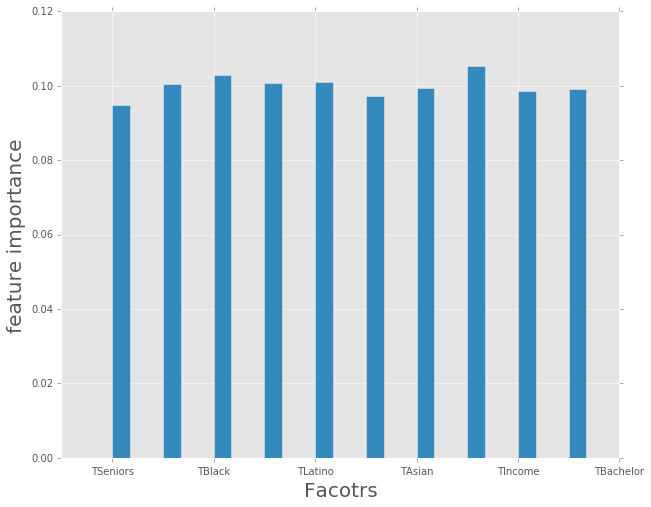

In [177]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.bar(array_a, model.feature_importances_, 0.35)
ax.set_ylabel('Feature importance', fontsize=20)
ax.set_xlabel('Facotrs', fontsize=20)
ax.set_xlim(-1,10)
ax.set_xticklabels(['TFemale', 'TSeniors', 'TBlack', 'TLatino', 'TAsian',\
                 'TIncome', 'TBachelor', 'TArea', 'TRacialDiversity', 'TForeign'])

In [183]:
data.columns.values

array(['trump', 'clinton', 'processed', 'area_name', 'state_abbreviation',
       'Population', 'PST040210', 'PST120214', 'POP010210', 'AGE135214',
       'Population18', 'Population65', 'Female', 'White', 'Black',
       'RHI325214', 'Asian', 'RHI525214', 'Mixed', 'Latino', 'WhiteNH',
       'POP715213', 'Foreign', 'POP815213', 'EDU635213', 'Bachelor',
       'VET605213', 'LFE305213', 'HSG010214', 'HomeOwners', 'HSG096213',
       'HSG495213', 'HSD410213', 'HSD310213', 'Income', 'INC110213',
       'PVY020213', 'BZA010213', 'BZA110213', 'BZA115213', 'NES010213',
       'SBO001207', 'SBO315207', 'SBO115207', 'SBO215207', 'SBO515207',
       'SBO415207', 'SBO015207', 'MAN450207', 'WTN220207', 'RTN130207',
       'RTN131207', 'AFN120207', 'BPS030214', 'LND110210', 'Density',
       'trumpp', 'TElectorate', 'TFemale', 'TSeniors', 'TWhite', 'TBlack',
       'TLatino', 'TAsian', 'TIncome', 'TBachelor', 'TArea',
       'TRacialDiversity', 'TForeign', 'SElectorate', 'SFemale',
       'SSenior

In [190]:
data_new.columns.values

array(['Female', 'Population65', 'WhiteNH', 'Black', 'Latino', 'Asian',
       'Income', 'Bachelor', 'HomeOwners', 'Foreign'], dtype=object)

[ 0.09922906  0.10538819  0.10173514  0.09665463  0.10003048  0.08189062
  0.10855958  0.10413681  0.10598438  0.09639112]


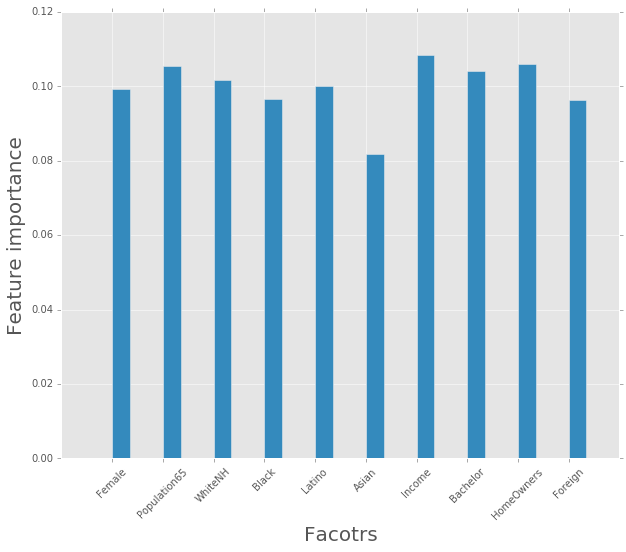

In [196]:
col = ['Female', 'Population65', 'WhiteNH', 'Black', 'Latino', 'Asian', 'Income', 'Bachelor', 'HomeOwners', 'Foreign']
data_new = data[col]
data_new = data_new.dropna()
clf = RandomForestClassifier(n_estimators=100)
model = clf.fit(data_new, data.trump)
print model.feature_importances_
array_a = np.arange(len(data_new.columns.values))
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.bar(array_a, model.feature_importances_, 0.35)
ax.set_ylabel('Feature importance', fontsize=20)
ax.set_xlabel('Facotrs', fontsize=20)
ax.set_xlim(-1,10)
ax.set_xticks(array_a)
ax.set_xticklabels(col, rotation=45)